In [1]:
import numpy as np
import matplotlib.pyplot as plt

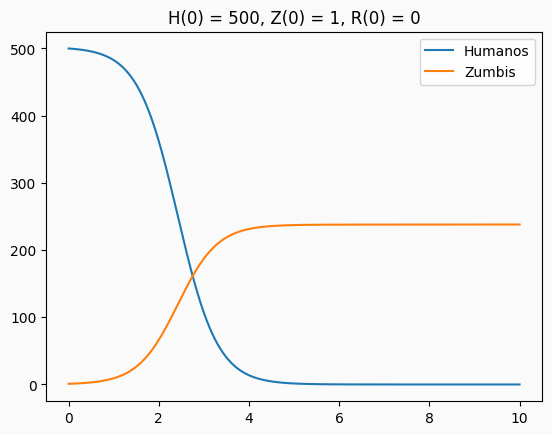

In [2]:
def f(t,H,Z,R):
    beta = 0.0095
    zeta = 0.0001
    alfa = 0.005
    
    return np.array([-beta*H*Z,
                     beta*H*Z + zeta*R - alfa*H*Z,
                     alfa*H*Z - zeta*R])

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_euler(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,3))
    
    w[0,0] = y[0]
    w[0,1] = y[1]
    w[0,2] = y[2]
    
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*f(t[i-1], w[i-1,0], w[i-1,1], w[i-1,2])
        
    return w,t

def metodo_de_runge_kutta(N, y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,3))
    
    w[0,0] = y[0]
    w[0,1] = y[1]
    w[0,2] = y[2]
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1,0], w[i-1,1], w[i-1,2])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K1[0], w[i-1,1] + 0.5*K1[1], w[i-1,2] + 0.5*K1[2])
        K3 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K2[0], w[i-1,1] + 0.5*K2[1], w[i-1,2] + 0.5*K2[2])
        K4 = h*f(t[i], w[i-1,0] + K3[0], w[i-1,1] + K3[1], w[i-1,2] + K3[2])
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

N = 1000
y0 = np.array([500,1,0])
tmin, tmax = 0, 10

w,t = metodo_de_runge_kutta(N, y0, tmin, tmax)

fig, ax = plt.subplots(facecolor='#FAFAFA')
ax.set_facecolor('#FAFAFA')

ax.plot(t, w[:,0], label='Humanos')
ax.plot(t, w[:,1], label='Zumbis')
# ax.plot(t, w[:,2], label='Removidos')
ax.set_title("H(0) = 500, Z(0) = 1, R(0) = 0")
ax.legend()

# plt.savefig("2.pdf")
plt.show()

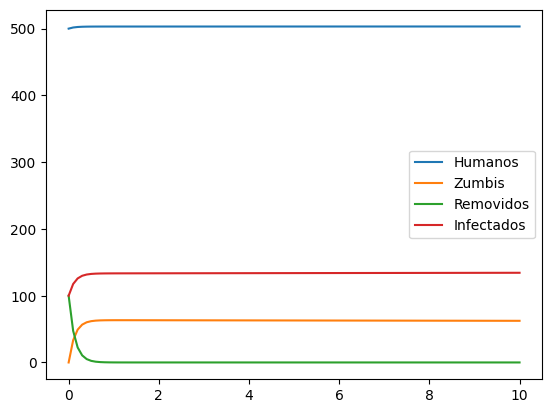

In [10]:
def f(t,H,I,Z,R):
    beta = 0.0095
    zeta = 0.0001
    alfa = 0.005
    c    = 5
    ro   = 0.005
    
    return np.array([-beta*H*Z + c*Z,
                     beta*H*Z - ro*I,
                     ro*I + zeta*R - alfa*H*Z - c*Z,
                     alfa*H*Z - zeta*R])

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_runge_kutta(N, y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,4))
    
    w[0,0] = y[0]
    w[0,1] = y[1]
    w[0,2] = y[2]
    w[0,3] = y[3]
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1,0], w[i-1,1], w[i-1,2], w[i-1,3])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K1[0], w[i-1,1] + 0.5*K1[1], w[i-1,2] + 0.5*K1[2], w[i-1,3] + 0.5*K1[3])
        K3 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K2[0], w[i-1,1] + 0.5*K2[1], w[i-1,2] + 0.5*K2[2], w[i-1,3] + 0.5*K2[3])
        K4 = h*f(t[i], w[i-1,0] + K3[0], w[i-1,1] + K3[1], w[i-1,2] + K3[2], w[i-1,3] + K3[3])
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

N = 100
y0 = np.array([500,0,100,100])
tmin, tmax = 0, 10

w,t = metodo_de_runge_kutta(N, y0, tmin, tmax)

plt.plot(t, w[:,0], label='Humanos')
plt.plot(t, w[:,1], label='Zumbis')
plt.plot(t, w[:,2], label='Removidos')
plt.plot(t, w[:,3], label='Infectados')
plt.legend()
plt.show()